In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report

In [160]:
heart = pd.read_csv(r'C:\Users\Hp\OneDrive\Desktop\ML\Heart_Disease_Prediction\Dataset\heart_disease_data.csv')

In [161]:
heart.shape

(303, 14)

In [162]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [163]:
heart.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [164]:
heart.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

In [165]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [166]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


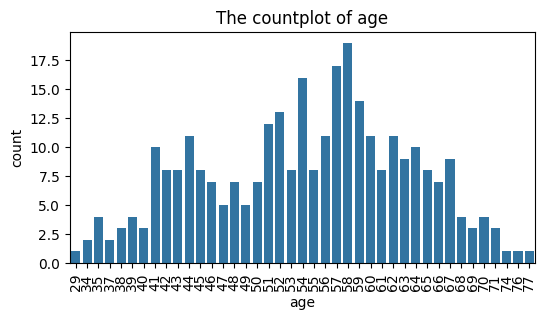

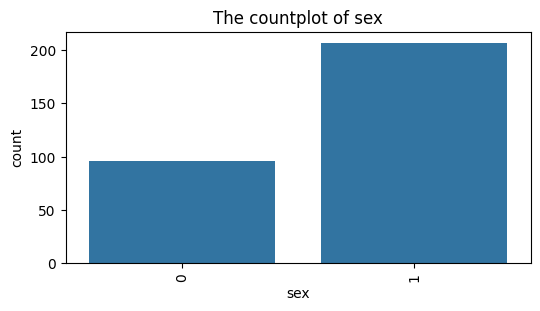

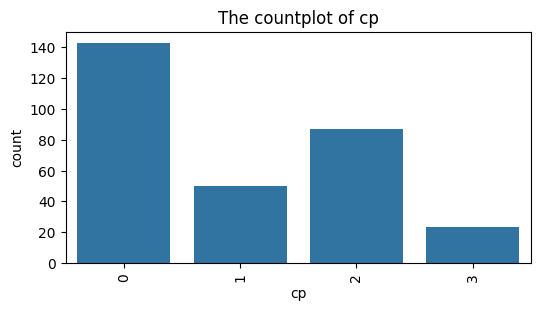

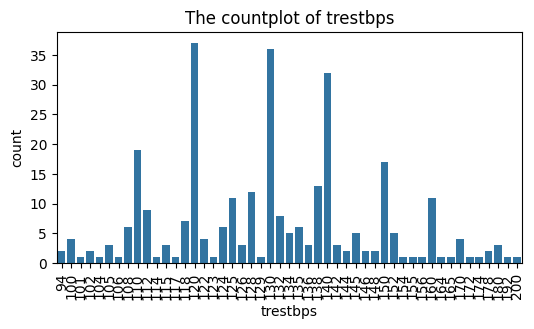

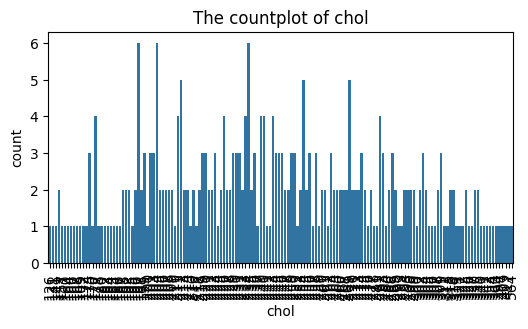

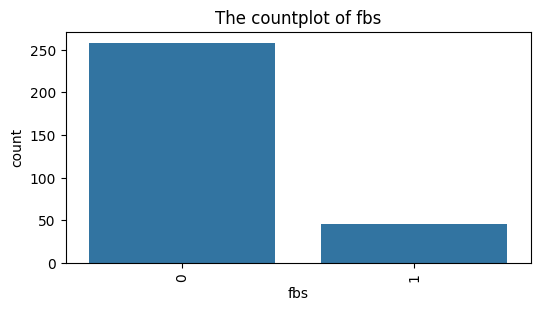

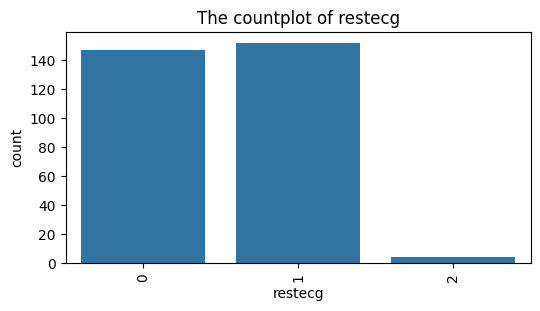

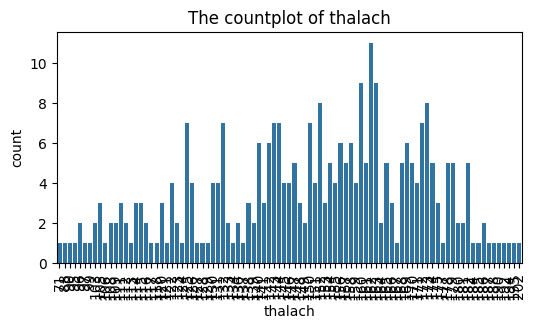

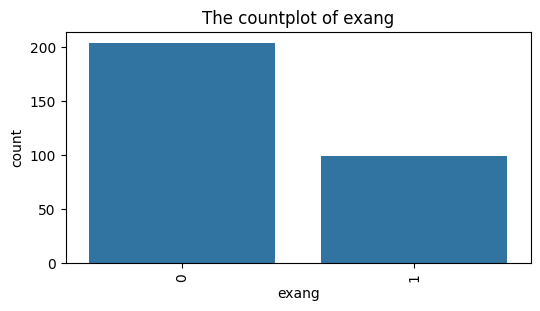

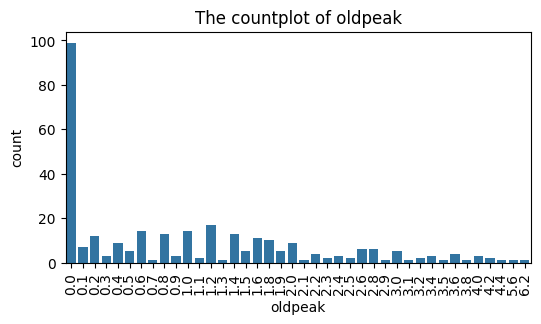

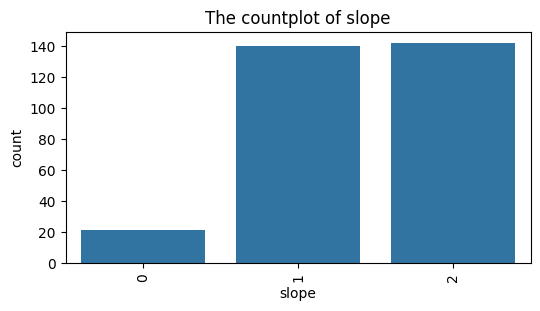

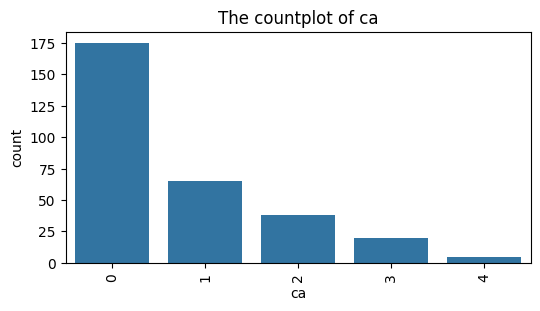

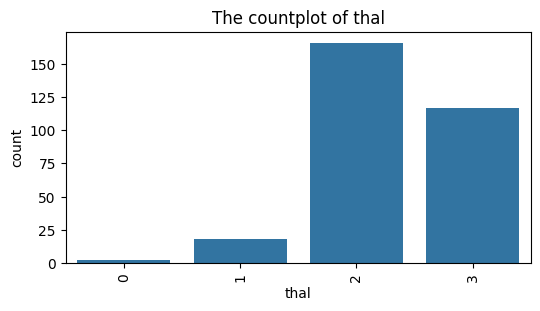

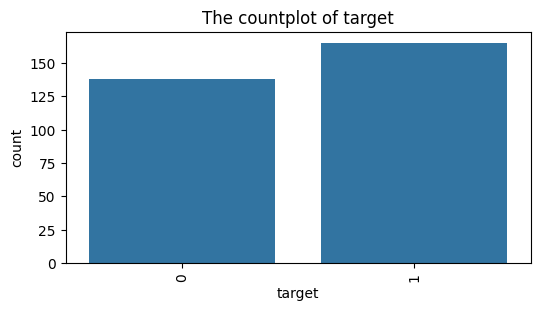

In [167]:
# List of features for which we want to create count plots
features = heart.select_dtypes(include = ['int64', 'float64']).columns
# Loop through each feature in the list
for i, feature in enumerate(features):
    # Create a new figure with specified size
    plt.figure(figsize=(6, 3))
    
    # Create a count plot for the current feature
    sns.countplot(x=feature, data=heart)
    
    # Set the title of the plot
    plt.title(f'The countplot of {feature}')
    
    # Rotate x-axis labels by 90 degrees for better readability
    plt.xticks(rotation=90)
    
    # Display the plot
    plt.show()

In [169]:
encoded_sex = pd.get_dummies(heart['sex'], prefix='sex')
encoded_cp = pd.get_dummies(heart['cp'], prefix='cp')
encoded_fbs = pd.get_dummies(heart['fbs'], prefix='fbs')
encoded_restecg = pd.get_dummies(heart['restecg'], prefix='restecg')
encoded_exang = pd.get_dummies(heart['exang'], prefix='exang')
encoded_slope = pd.get_dummies(heart['slope'], prefix='slope')
encoded_ca = pd.get_dummies(heart['ca'], prefix='ca')
encoded_thal = pd.get_dummies(heart['thal'], prefix='thal')
heart = pd.concat([heart, encoded_sex, encoded_cp, encoded_fbs, encoded_restecg, encoded_exang, encoded_slope, encoded_ca, encoded_thal], axis=1)
heart.drop(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'], inplace=True, axis=1)


In [170]:
boolean_column = heart.select_dtypes(include=['bool']).columns
for col in boolean_column:
    heart[col] = heart[col].astype(int)

In [171]:
heart.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [172]:
X = heart.drop('target', axis=1)
y=heart['target']

model = RandomForestClassifier()
model.fit(X, y)

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
print("Feature importances:\n", feature_importances)

Feature importances:
 age          0.071342
trestbps     0.059741
chol         0.060466
thalach      0.098314
oldpeak      0.088188
sex_0        0.019707
sex_1        0.019243
cp_0         0.092910
cp_1         0.011836
cp_2         0.022831
cp_3         0.009123
fbs_0        0.005573
fbs_1        0.006923
restecg_0    0.013341
restecg_1    0.012951
restecg_2    0.000573
exang_0      0.046053
exang_1      0.029247
slope_0      0.003294
slope_1      0.029840
slope_2      0.026776
ca_0         0.084045
ca_1         0.018870
ca_2         0.012424
ca_3         0.009216
ca_4         0.001843
thal_0       0.000926
thal_1       0.004459
thal_2       0.088482
thal_3       0.051460
dtype: float64


In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [174]:
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)

(242, 30) (61, 30) (242,) (61,)


In [175]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [179]:
# Define the RandomForestClassifier and its parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, 
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=2)

# Fit Grid Search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found:")
print(grid_search.best_params_)
print("Best cross-validation accuracy:")
print(grid_search.best_score_)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_rf_model.predict(X_test)

# Print evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation accuracy:
0.8304421768707483

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Accuracy: 0.8688524590163934
